In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime

## Fast Fourier Transform

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
merged_data = pd.read_csv('../data/Final_dataset.csv')[:10000]

In [60]:
vega_values = merged_data['Vega'].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# Split the data into training and testing sets
train_vega, test_vega = train_test_split(vega_values, test_size=0.3, random_state=42)

In [63]:
# Apply Fourier Transform on the training set
fft_values = np.fft.fft(train_vega)

In [64]:
# Get frequencies corresponding to the FFT values
frequencies = np.fft.fftfreq(len(train_vega))

[ 0.          0.00014286  0.00028571 ... -0.00042857 -0.00028571
 -0.00014286]
拟合的周期性函数公式为:
y(x) = 0.79 * sin(1 * x + 1.86) + 1.20 * sin(2 * x + 2.51) + 1.76 * sin(3 * x + -2.54) + 0.50 * sin(4 * x + 0.76) + 2.88 * sin(5 * x + 1.44) + 3.40 * sin(6 * x + 2.07) + 1.03 * sin(7 * x + -2.82) + 2.55 * sin(8 * x + 1.62) + 2.42 * sin(9 * x + -1.00) + 1.08 * sin(10 * x + -1.28) + 3.14 * sin(11 * x + -0.35) + 2.74 * sin(12 * x + -2.84) + 0.43 * sin(13 * x + 0.57) + 1.34 * sin(14 * x + -0.07) + 0.86 * sin(15 * x + -2.04) + 1.71 * sin(16 * x + 0.13) + 0.90 * sin(17 * x + -1.27) + 0.65 * sin(18 * x + -1.23) + 2.39 * sin(19 * x + -2.98) + 3.92 * sin(20 * x + 2.56) + 1.10 * sin(21 * x + -0.36) + 1.03 * sin(22 * x + -1.68) + 1.10 * sin(23 * x + -1.46) + 3.31 * sin(24 * x + 2.59) + 3.27 * sin(25 * x + -0.42) + 1.67 * sin(26 * x + 2.36) + 1.42 * sin(27 * x + 1.52) + 2.23 * sin(28 * x + -1.11) + 2.18 * sin(29 * x + -2.87) + 2.81 * sin(30 * x + 2.23) + 4.30 * sin(31 * x + 1.34) + 3.31 * sin(32 * x + -2.93

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


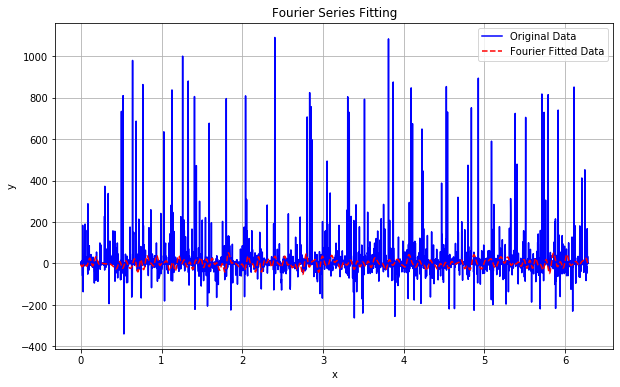

11638.891875136194


In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the Trainset signal 
x = np.linspace(0, 2 * np.pi, len(train_vega))
y = np.sin(x) + 0.5 * np.sin(2 * x) + 0.2 * np.sin(3 * x) + 0.1 * np.sin(4 * x)

# Fast Fourier transformation
fft_values = np.fft.fft(train_vega)
N = len(fft_values) 
n = np.arange(N)

frequencies = np.fft.fftfreq(len(train_vega))

T = n / frequencies
# FFT coefficient
A = 2/N * np.abs(fft_values[:N//2])  #  Half since it is symmetric

# Construct the formula
num_harmonics = 100
components = []
for k in range(1, num_harmonics + 1):
    amplitude = A[k]
    phase = np.angle(fft_values[k])
    components.append(f"{amplitude:.2f} * sin({k} * x + {phase:.2f})")

formula = " + ".join(components)

# Formula is
print("The formula is")
print(f"y(x) = {formula}")

# Test Set Input
x_test = np.linspace(0, 2 * np.pi, len(test_vega))
y_test = np.sin(x) + 0.5 * np.sin(2 * x) + 0.2 * np.sin(3 * x) + 0.1 * np.sin(4 * x)

# FFTransformation
fft_value_test = np.fft.fft(test_vega)
N = len(fft_value_test) 
n = np.arange(N)

y_fitted = np.zeros_like(x_test)
for k in range(1, num_harmonics + 1):
    amplitude = A[k]
    phase = np.angle(fft_values[k])
    y_fitted += amplitude * np.sin(k * x_test + phase)


plt.figure(figsize=(10, 6))
plt.plot(x_test, test_vega, label='Original Data', color='blue')
plt.plot(x_test, y_fitted, label='Fourier Fitted Data', color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fourier Series Fitting')
plt.grid(True)
plt.show()

mse = mean_squared_error(test_vega, y_fitted)
print(mse)